# 2.Build a multiclass classification model using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.4992 - accuracy: 0.4529 - val_loss: 1.2430 - val_accuracy: 0.5568
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1317 - accuracy: 0.5980 - val_loss: 1.0506 - val_accuracy: 0.6299
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9731 - accuracy: 0.6556 - val_loss: 0.9491 - val_accuracy: 0.6663
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8713 - accuracy: 0.6925 - val_loss: 0.9665 - val_accuracy: 0.6631
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7995 - accuracy: 0.7165 - val_loss: 0.8890 - val_accuracy: 0.6910
Epoch 6/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.7345 - accuracy: 0.7433 - val_loss: 0.8530 - val_accuracy: 0.7083
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6842 - accuracy: 0.7594 - val_loss: 0.8871 -

In [12]:
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

Test Loss: 0.8913
Test Accuracy: 0.7170


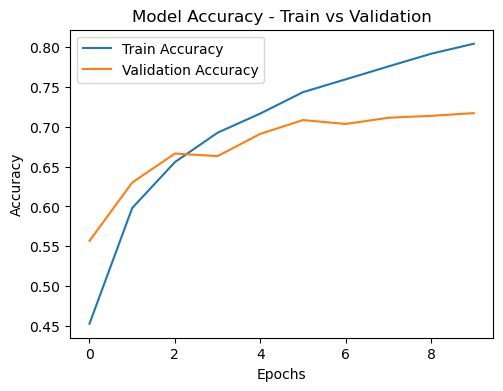

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - Train vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


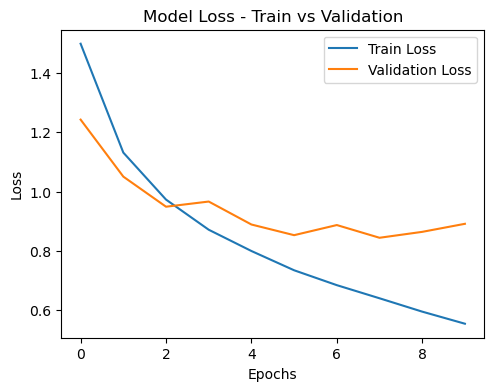

In [11]:
# Plot loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Train vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


